# Tuning Development Patterns

In [1]:
import chainladder as cl
import pandas as pd

This example demonstrates testing multiple number of periods and averages in the
development transformer to see its influence on the overall ultimate estimate.


In [2]:
tri = cl.load_sample('abc')

# Set up Pipeline
pipe = cl.Pipeline(steps=[
    ('dev',cl.Development()),
    ('chainladder',cl.Chainladder())])

# Develop scoring function that returns an Ultimate/Incurred Ratio

# Set up a GridSearch space
grid = cl.GridSearch(
    estimator=pipe,
    param_grid=dict(
        dev__n_periods=[item for item in range(2,11)],
        dev__average=['simple', 'volume', 'regression']),
    scoring=lambda x: (
        x.named_steps.chainladder.ultimate_.sum() /
        tri.latest_diagonal.sum()))
grid.fit(tri)

# Plot data
results = pd.pivot_table(grid.results_, index='dev__n_periods',
                         columns='dev__average', values='score')

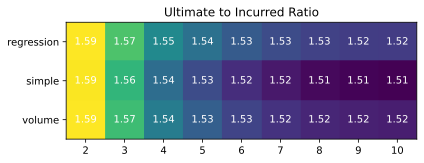

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots()
im = ax.imshow(results.T)
ax.set_yticks(np.arange(len(results.columns)))
ax.set_xticks(np.arange(len(results.index)))
ax.set_yticklabels(results.columns)
ax.set_xticklabels(results.index)
for i in range(len(results.index)):
    for j in range(len(results.columns)):
        text = ax.text(i, j, results.round(2).values[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Ultimate to Incurred Ratio")
fig.tight_layout()
plt.show()

In [ ]:
from myst_nb import glue
glue("plot_development_periods", fig, display=False)